In [2]:
# Imports nécessaires
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

import nltk
from nltk.corpus import stopwords


c:\Users\elabi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Charger le dataset depuis Hugging Face
dataset = load_dataset("SetFit/ag_news", split="train")

# Conversion en DataFrame pandas
df = dataset.to_pandas()

df.head()


,text,label,label_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


In [5]:
df['text'].duplicated().sum()

np.int64(0)

In [6]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        120000 non-null  object
 1   label       120000 non-null  int64 
 2   label_text  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
print("Shape :", df.shape)
print("\nValeurs manquantes :")
print(df.isnull().sum())


Shape : (120000, 3)

Valeurs manquantes :
text          0
label         0
label_text    0
dtype: int64


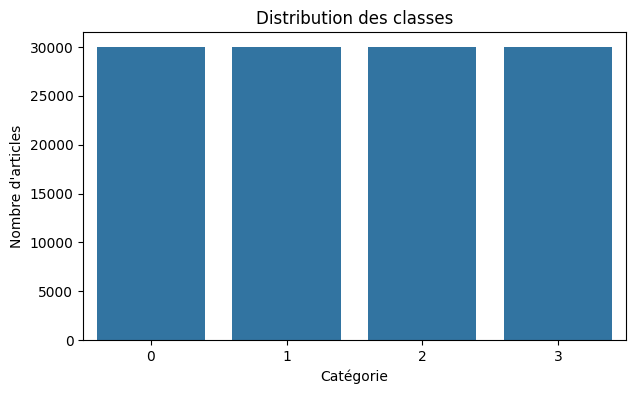

In [8]:
plt.figure(figsize=(7,4))
sns.countplot(x=df["label"])
plt.title("Distribution des classes")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'articles")
plt.show()


In [9]:
for label in sorted(df["label"].unique()):
    print("="*60)
    print(f" Exemple pour la classe {label}:")
    print(df[df["label"] == label].iloc[0]["text"])


 Exemple pour la classe 0:
Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.
 Exemple pour la classe 1:
Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries.
 Exemple pour la classe 2:
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
 Exemple pour la classe 3:
'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reut

In [10]:
df["text_length"] = df["text"].apply(len)

df["text_length"].describe()


count    120000.000000
mean        236.477525
std          66.509741
min         100.000000
25%         196.000000
50%         232.000000
75%         266.000000
max        1012.000000
Name: text_length, dtype: float64

In [11]:
df.head()

,text,label,label_text,text_length
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business,144
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business,266
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business,232
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business,256
4,"Oil prices soar to all-time record, posing new...",2,Business,234


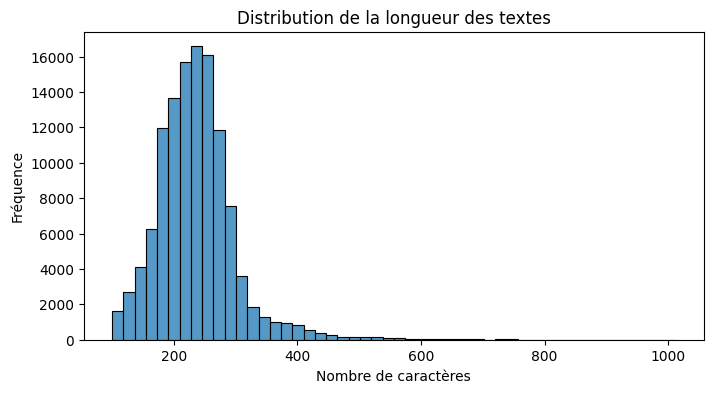

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df["text_length"], bins=50)
plt.title("Distribution de la longueur des textes")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()


In [18]:
df = df[["text", "label", "label_text"]]


In [19]:
df.head()

,text,label,label_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


In [ ]:
# df.to_csv('../Data/raw/data.csv', index=False)

: 